## NAME - HIBAH MOHAMMED GHOUSE
## ZID - Z1945894

In [29]:
# Import Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.cluster.hierarchy as shc
from sklearn import cluster, datasets, mixture
from sklearn.cluster import KMeans
from numpy import unique
from numpy import where
from sklearn.datasets import make_classification
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import DBSCAN
from sklearn.mixture import GaussianMixture
from matplotlib import pyplot


## 1. Generate “X_aniso” dataset using the following code.


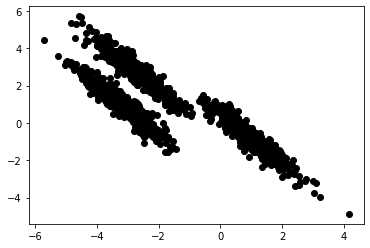

In [30]:
n_samples = 1500
random_state = 170
X, y= datasets.make_blobs(n_samples = n_samples, random_state = random_state)
transformation= [[0.6, -0.6], [-0.4, 0.8]]
X_aniso= np.dot(X, transformation)
col1 = X_aniso[:,0]
col2 = X_aniso[:,1]
plt.plot(col1, col2, 'o', color='black')
plt.show()

## 2. Train K-Means, Agglomerative, DBSCAN and GMM clustering algorithm on X_aniso.Visualize their clusters in different colors and write a short paragraph to compare their results.

In [31]:
def getColumn(arr, rowIdxList, colIdx):
    return arr[rowIdxList, colIdx];


In [32]:
def plot_clusters(model, X):

    pred = model.fit_predict(X)
    clusters = unique(pred)
    for cluster in clusters:
        row_idx = where(pred == cluster)
        # create scatter of these samples
        col0 = getColumn(X, row_idx, 0)
        col1 = getColumn(X, row_idx, 1)
        pyplot.scatter(col0, col1)
    # show the plot
    pyplot.show()

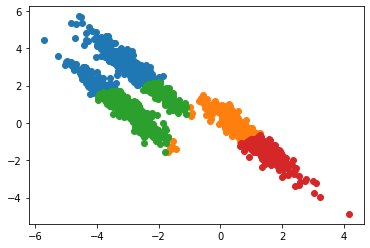

In [33]:
plot_clusters(KMeans(n_clusters=4,random_state=0), X_aniso)

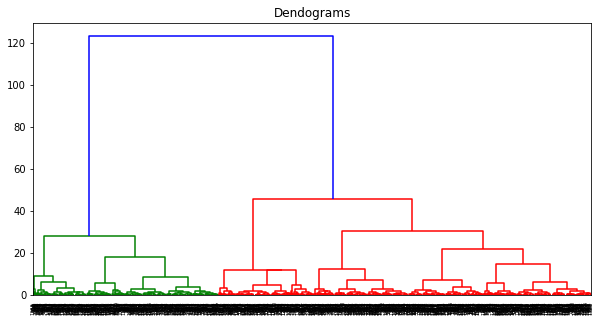

In [34]:
plt.figure(figsize=(10, 5))
plt.title("Dendograms")
dend = shc.dendrogram(shc.linkage(X_aniso, method='ward'))

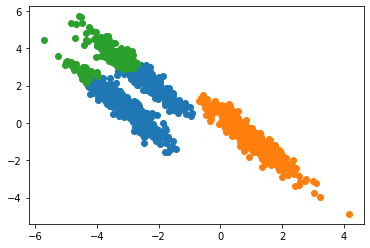

In [41]:
plot_clusters(AgglomerativeClustering(n_clusters=3), X_aniso)

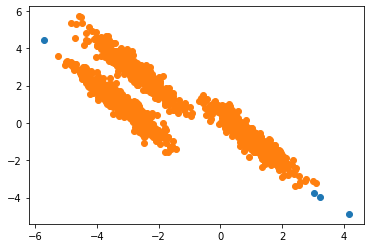

In [39]:
plot_clusters(DBSCAN(), X_aniso)

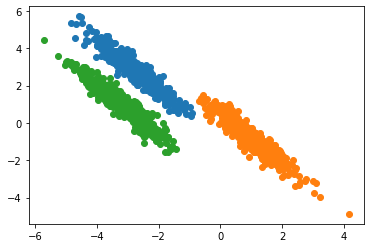

In [40]:
plot_clusters(GaussianMixture(n_components=3), X_aniso)

Comparison-

K-means is a distance based algorithm which clusters into 4 different groups. It was not able to group the data uniformly. In the plot , the input data does not conform to some implicit assumption that k-means makes and undesirable clusters are produced as a result.


Agglomerative clustering uses dendogram to cluster into 3 groups with no relations shown properly.


DBSCAN was supposed to perform better when compared to other algorithms. But for this data only two clusters were formed. It was able to mark outliers seperately.



Gaussian mixture model did the best than other models. It provided the relations in the clusters seperating them in the best possible way from each other.